# Problem Statement :

## Given the following data for various credit card transactions, create a model to detect if a transaction made is Fraudulent or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV# Problem Statement :

## Given the following data for various credit card transactions, create a model to detect if a transaction made is Fraudulent or not

# Model
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df = data.copy()
df.shape

(284807, 31)

In [4]:
df.isnull().sum().sum()

0

### No null values present within the dataset

In [5]:
# 2 O/P classes (0 : Normal, 1 : Fraud)
df.Class.unique()

array([0, 1], dtype=int64)

In [6]:
# We can clearly see a case of Imbalanced Dataset here

df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Exploratory Data Analysis (EDA)

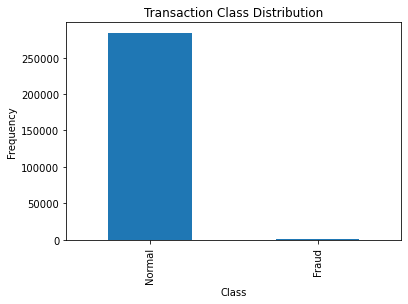

In [7]:
# Visualizing the Imbalance nature of the dataset

Labels = ["Normal", "Fraud"]

count_classes = data['Class'].value_counts()

count_classes.plot(kind = 'bar')

plt.title("Transaction Class Distribution")
plt.xticks([0, 1], Labels)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [8]:
# Imbalanced nature of the dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

print('Fraud Transactions : ', fraud.shape[0])
print('Normal Transactions : ', normal.shape[0])

Fraud Transactions :  492
Normal Transactions :  284315


### There is an imbalanceness present within the dataset which needs to be handled

## Train-Test Split

In [9]:
X = df.drop(['Class'], axis=1)

In [10]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [11]:
y = df.Class
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
y_train.value_counts()

0    190477
1       343
Name: Class, dtype: int64

In [14]:
y_test.value_counts()

0    93838
1      149
Name: Class, dtype: int64

### Performing OverSampling using RandomOverSampler() method from imblearn library

In [15]:
sampler = RandomOverSampler()

### Resampling separately for Train data & Test data, in order to avoid Data Leakage

In [16]:
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)

In [17]:
y_train_resampled.value_counts()

0    190477
1    190477
Name: Class, dtype: int64

In [18]:
X_test_resampled, y_test_resampled = sampler.fit_resample(X_test, y_test)

In [19]:
y_test_resampled.value_counts()

0    93838
1    93838
Name: Class, dtype: int64

In [20]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((190820, 30), (190820,)), ((93987, 30), (93987,)))

In [21]:
(X_train_resampled.shape, y_train_resampled.shape), (X_test_resampled.shape, y_test_resampled.shape)

(((380954, 30), (380954,)), ((187676, 30), (187676,)))

## Training

### 1. RandomForest Model

In [22]:
rf = RandomForestClassifier()

In [23]:
rf_model = rf.fit(X_train_resampled, y_train_resampled)

In [24]:
rf_model.score(X_test_resampled, y_test_resampled)

0.9064451501523902

### Model Performance

In [25]:
y_pred = rf_model.predict(X_test_resampled)

In [26]:
print("Classification Report: \n\n", classification_report(y_test_resampled, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.84      1.00      0.91     93838
           1       1.00      0.81      0.90     93838

    accuracy                           0.91    187676
   macro avg       0.92      0.91      0.91    187676
weighted avg       0.92      0.91      0.91    187676



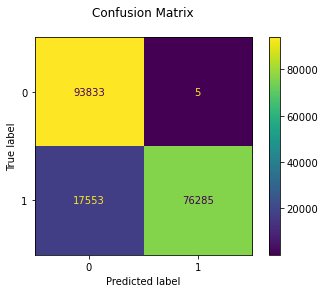

In [27]:
plot_confusion_matrix(rf_model, X_test_resampled, y_test_resampled)
plt.title('Confusion Matrix\n')
plt.show()

### 2. XGBoost Model

In [28]:
xg = XGBClassifier()

In [29]:
xg_model = xg.fit(X_train_resampled, y_train_resampled)

C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:03:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [30]:
xg_model.score(X_test_resampled, y_test_resampled)

0.9232347236727125

### Model Performance

In [31]:
y_pred = xg_model.predict(X_test_resampled)

In [32]:
print("Classification Report: \n\n", classification_report(y_test_resampled, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.87      1.00      0.93     93838
           1       1.00      0.85      0.92     93838

    accuracy                           0.92    187676
   macro avg       0.93      0.92      0.92    187676
weighted avg       0.93      0.92      0.92    187676



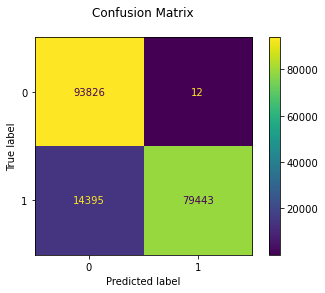

In [33]:
plot_confusion_matrix(xg_model, X_test_resampled, y_test_resampled)
plt.title('Confusion Matrix\n')
plt.show()

### XGBoost Hyperparameter Tuning

In [34]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [35]:
rs_cv = RandomizedSearchCV(xg, param_distributions=params, n_iter=5, n_jobs=1, cv=5)

In [ ]:
xg_rs = rs_cv.fit(X_train_resampled, y_train_resampled)

In [37]:
xg_rs.score(X_test_resampled, y_test_resampled)

0.9199258296212621

In [38]:
xg_rs.best_params_

{'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [39]:
xg_rs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Model Performance

In [40]:
y_pred = xg_rs.predict(X_test_resampled)

In [41]:
print("Classification Report: \n\n", classification_report(y_test_resampled, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.86      1.00      0.93     93838
           1       1.00      0.84      0.91     93838

    accuracy                           0.92    187676
   macro avg       0.93      0.92      0.92    187676
weighted avg       0.93      0.92      0.92    187676



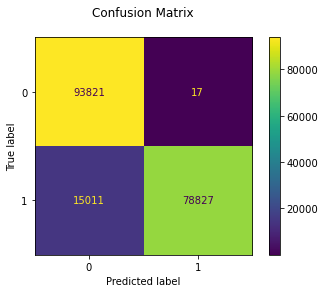

In [42]:
plot_confusion_matrix(xg_rs, X_test_resampled, y_test_resampled)
plt.title('Confusion Matrix\n')
plt.show()